# Prisoner's Dilemma

**Students:**<br>
Caio Fernandes - 20193001742<br>
Filipe Rocha - 20193003809<br> 
Italo Donato - 20193007076<br> 
Rodrigo Lapertosa - 201712040472<br> 
Rosane Araujo - 20193007058

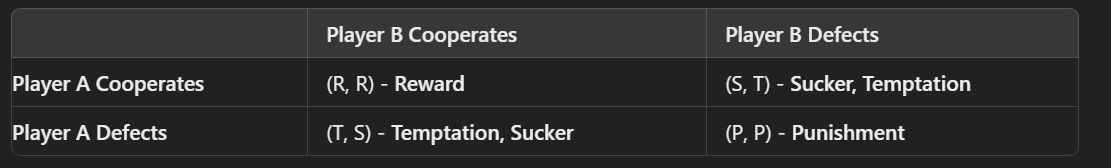

**Definitions of Payoffs:**
- Reward (R): Both players cooperate. Each gets a moderate payoff (e.g., 3). This is mutually beneficial but not the highest possible payoff for a single player.
- Temptation (T): One player defects while the other cooperates. The defector gets the highest individual payoff (e.g., 5), taking advantage of the cooperator.
- Sucker (S): One player cooperates while the other defects. The cooperator gets the lowest payoff (e.g., 0), being exploited by the defector.
- Punishment (P): Both players defect. Each gets a low payoff (e.g., 1), representing mutual harm.

**Nash Equilibrium:**<br><br>
In the classic Prisoner's Dilemma, the Nash Equilibrium occurs when both players defect (D, D). Neither player can improve their outcome by unilaterally changing their choice. Defection is a dominant strategy because it provides a better or equal payoff regardless of the other player's choice.

In [47]:
import random
import pandas as pd

### Define payoffs

In [48]:
R, T, P, S = 3, 5, 1, 0

### Define strategies

In [49]:
def always_cooperate():
    return 'C'

def always_defect():
    return 'D'

def tit_for_tat(opponent_last_move):
    return opponent_last_move if opponent_last_move else 'C'

def grim_trigger(opponent_moves):
    return 'D' if 'D' in opponent_moves else 'C'

def random_choice():
    return random.choice(['C', 'D'])

### Define player's behavior

In [50]:
strategies = {
    'always_cooperate': always_cooperate,
    'always_defect': always_defect,
    'tit_for_tat': tit_for_tat,
    'grim_trigger': grim_trigger,
    'random_choice': random_choice
}


### Get payoffs

In [51]:
def get_payoff(player1_move, player2_move):
    if player1_move == 'C' and player2_move == 'C':
        return R, R
    elif player1_move == 'D' and player2_move == 'C':
        return T, S
    elif player1_move == 'C' and player2_move == 'D':
        return S, T
    else:
        return P, P

### Check if Nash's equilibrium is reached

In [52]:
def is_nash_equilibrium(player1_moves, player2_moves):
    if not player1_moves or not player2_moves:
        return False
    return player1_moves[-1] == 'D' and player2_moves[-1] == 'D'

### Run simulation until Nash Equilibrium is reached

In [53]:
def run_simulation(strategy1, strategy2, max_rounds=100):
    player1_moves = []
    player2_moves = []
    player1_payoff = 0
    player2_payoff = 0
    
    for round_num in range(1, max_rounds + 1):
        # Determine moves based on strategies
        if strategy1 == tit_for_tat:
            move1 = strategy1(player2_moves[-1] if player2_moves else None)
        elif strategy1 == grim_trigger:
            move1 = strategy1(player2_moves)
        else:
            move1 = strategy1()
        
        if strategy2 == tit_for_tat:
            move2 = strategy2(player1_moves[-1] if player1_moves else None)
        elif strategy2 == grim_trigger:
            move2 = strategy2(player1_moves)
        else:
            move2 = strategy2()
        
        # Get payoffs
        payoff1, payoff2 = get_payoff(move1, move2)
        player1_payoff += payoff1
        player2_payoff += payoff2
        
        # Record moves
        player1_moves.append(move1)
        player2_moves.append(move2)
        
        # Check if Nash Equilibrium is reached
        if is_nash_equilibrium(player1_moves, player2_moves):
            return round_num, strategy1.__name__, strategy2.__name__, player1_payoff, player2_payoff

    return max_rounds, strategy1.__name__, strategy2.__name__, player1_payoff, player2_payoff


### Simulate all strategy combinations

In [54]:
results = []
strategy_list = list(strategies.values())

for i, strat1 in enumerate(strategy_list):
    for j, strat2 in enumerate(strategy_list):
        rounds, strat1_name, strat2_name, payoff1, payoff2 = run_simulation(strat1, strat2)
        results.append([rounds, strat1_name, strat2_name, payoff1, payoff2])

### Create a DataFrame to display results

In [55]:
df = pd.DataFrame(results, columns=['Rounds to Nash', 'Player 1 Strategy', 'Player 2 Strategy', 'Player 1 Payoff', 'Player 2 Payoff'])

In [56]:
df

,Rounds to Nash,Player 1 Strategy,Player 2 Strategy,Player 1 Payoff,Player 2 Payoff
0,100,always_cooperate,always_cooperate,300,300
1,100,always_cooperate,always_defect,0,500
2,100,always_cooperate,tit_for_tat,300,300
3,100,always_cooperate,grim_trigger,300,300
4,100,always_cooperate,random_choice,156,396
5,100,always_defect,always_cooperate,500,0
6,1,always_defect,always_defect,1,1
7,2,always_defect,tit_for_tat,6,1
8,2,always_defect,grim_trigger,6,1
9,4,always_defect,random_choice,16,1
